In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import json
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


EDA

1. Data Preproccesing

In [3]:
#Read the csv file into the pandas dataframe
df = pd.read_csv('C:/Users/admin/Downloads/Copper_Set.xlsx - Result 1.csv')

df.tail(5)


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.6865384,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


checcking missing values

In [4]:
missing_values = df.isna().sum()  # or df.isnull().sum()
print(missing_values)


id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [5]:
df_cleaned = df.dropna(subset=['id', 'item_date', 'customer', 'status', 'thickness', 'delivery date', 'selling_price'])


In [6]:
# For numerical or categorical data, use appropriate imputation methods
df['country'] = df['country'].fillna('Unknown')  # Example for categorical data
df['application'] = df['application'].fillna('Unknown')

# For numerical data, you could use mean, median, or mode imputation
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].median())


In [7]:
df_filled = df.fillna(method='ffill')  # Forward fill

In [8]:
missing_values = df_filled.isna().sum()  # or df.isnull().sum()
print(missing_values)


id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


 Checking for Duplicates

In [9]:
duplicates = df_filled.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
print(df_filled.dtypes)

id                object
item_date        float64
quantity tons     object
customer         float64
country           object
status            object
item type         object
application       object
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object


 2. Descriptive Statistics


Summary Statistics for Numerical Features

In [11]:
print(df_filled.describe())



          item_date      customer      thickness          width   product_ref  \
count  1.816730e+05  1.816730e+05  181673.000000  181673.000000  1.816730e+05   
mean   2.020459e+07  3.051221e+07       2.564818    1295.286724  4.739679e+08   
std    4.551114e+03  2.433375e+07       6.572304     261.631754  7.175101e+08   
min    1.995000e+07  1.245800e+04       0.180000       1.000000  6.117280e+05   
25%    2.020093e+07  3.019688e+07       0.700000    1180.000000  6.119930e+05   
50%    2.020113e+07  3.020524e+07       1.500000    1250.000000  6.406650e+05   
75%    2.021020e+07  3.028042e+07       3.000000    1500.000000  1.332077e+09   
max    2.021040e+07  2.147484e+09    2500.000000    2990.000000  1.722208e+09   

       delivery date  selling_price  
count   1.816730e+05   1.816730e+05  
mean    2.020738e+07   1.918029e+03  
std     2.411052e+04   3.317947e+05  
min     2.019040e+07  -1.160000e+03  
25%     2.020110e+07   6.690000e+02  
50%     2.021010e+07   8.120000e+02  
75% 

Summary Statistics for Categorical Features:

In [12]:
print(df_filled.describe(include='object'))

                                          id  quantity tons   country  status  \
count                                 181673  181673.000000  181673.0  181673   
unique                                181671  181673.000000      18.0       9   
top     3CD97E41-B14F-49D8-B2A3-5F42F3D0BAA8      54.151139      78.0     Won   
freq                                       2       1.000000   32084.0  116012   

       item type  application material_ref  
count     181673     181673.0       181673  
unique         7         31.0        16563  
top            W         10.0      DX51D+Z  
freq      105615      77544.0         1602  


Unique Values:



In [13]:
for column in df_filled.select_dtypes(include='object').columns:
    print(f"{column} unique values: {df[column].unique()}")

id unique values: ['EC06F063-9DF0-440C-8764-0B0C05A4F6AE'
 '4E5F4B3D-DDDF-499D-AFDE-A3227EC49425'
 'E140FF1B-2407-4C02-A0DD-780A093B1158' ...
 '91643238-5C7B-4237-9A5F-63AE3D35F320'
 '7AFFD323-01D9-4E15-B80D-7D1B03498FC8'
 'AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC']
quantity tons unique values: [54.15113862 768.0248392 386.1279489 ... '4.235593568' '-2000'
 '406.6865384']
country unique values: [28.0 25.0 30.0 32.0 38.0 78.0 27.0 77.0 113.0 79.0 26.0 39.0 40.0 84.0
 80.0 107.0 89.0 'Unknown']
status unique values: ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable' nan]
item type unique values: ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
application unique values: [10.0 41.0 28.0 59.0 15.0 4.0 38.0 56.0 42.0 26.0 27.0 19.0 20.0 66.0 29.0
 22.0 40.0 25.0 67.0 79.0 3.0 99.0 2.0 5.0 39.0 69.0 70.0 65.0 58.0 68.0
 'Unknown']
material_ref unique values: ['DEQ1 S460MC' '0000000000000000000000000000000000104991' 'S0380700' ...
 'MAS65550' '4.11043_

3. Data Visualization


Histograms: To understand the distribution of numerical features.



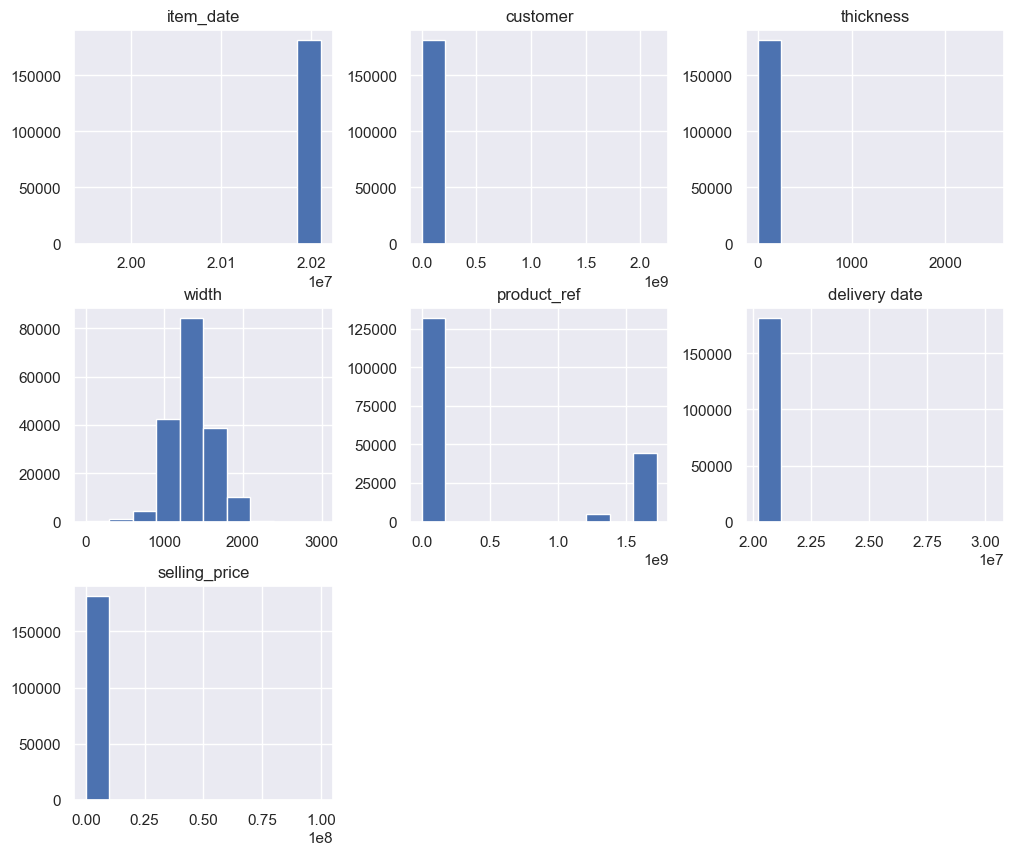

In [14]:
import matplotlib.pyplot as plt
df_filled.hist(figsize=(12, 10))
plt.show()


Box Plots: To visualize the distribution and detect outliers.



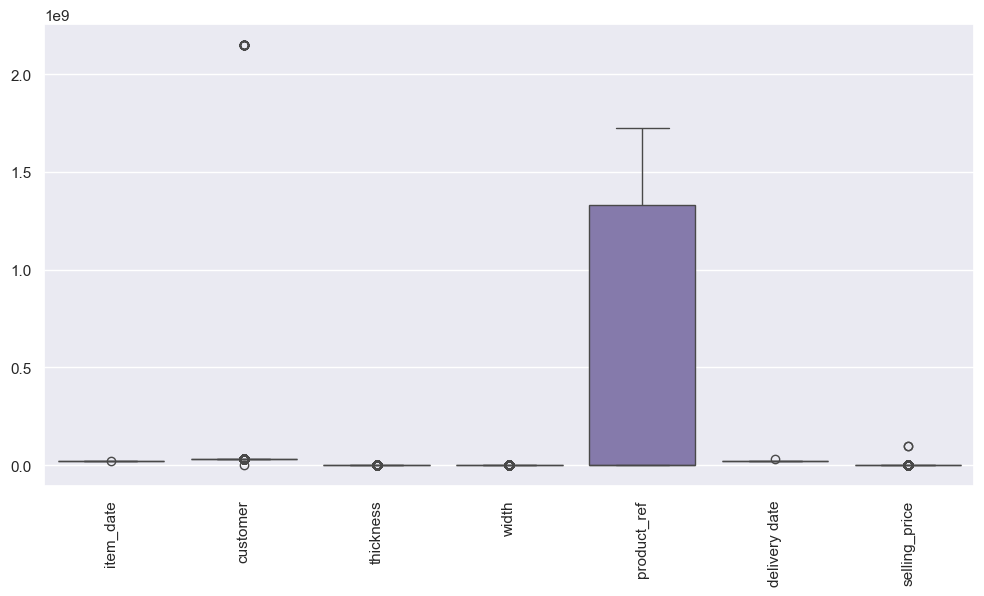

In [15]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


Pair Plots: To visualize relationships between numerical features.



Correlation Heatmap: To see correlations between numerical features.



In [16]:
print(df_filled.dtypes)


id                object
item_date        float64
quantity tons     object
customer         float64
country           object
status            object
item type         object
application       object
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object


In [17]:
for column in ['id', 'quantity tons', 'country', 'status', 'item type', 'application', 'material_ref']:
    df_filled[column] = df_filled[column].astype(str)


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = ['id', 'quantity tons', 'country', 'status', 'item type', 'application', 'material_ref']
for column in categorical_columns:
    df_filled[column] = le.fit_transform(df_filled[column])


In [19]:
# Check for missing values
print(df_filled.isna().sum())

# Fill missing values or handle them appropriately
df_filled = df_filled.fillna(method='ffill')  # Example: forward fill


id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


In [20]:
numeric_df = df_filled.select_dtypes(include=['number'])

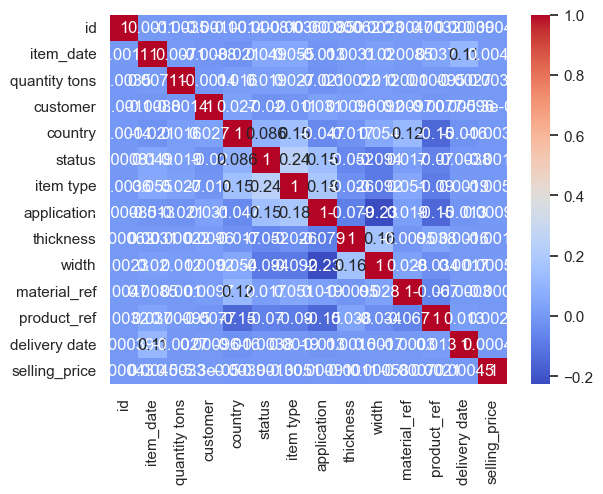

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Bar Plots: To visualize the frequency of categorical features.



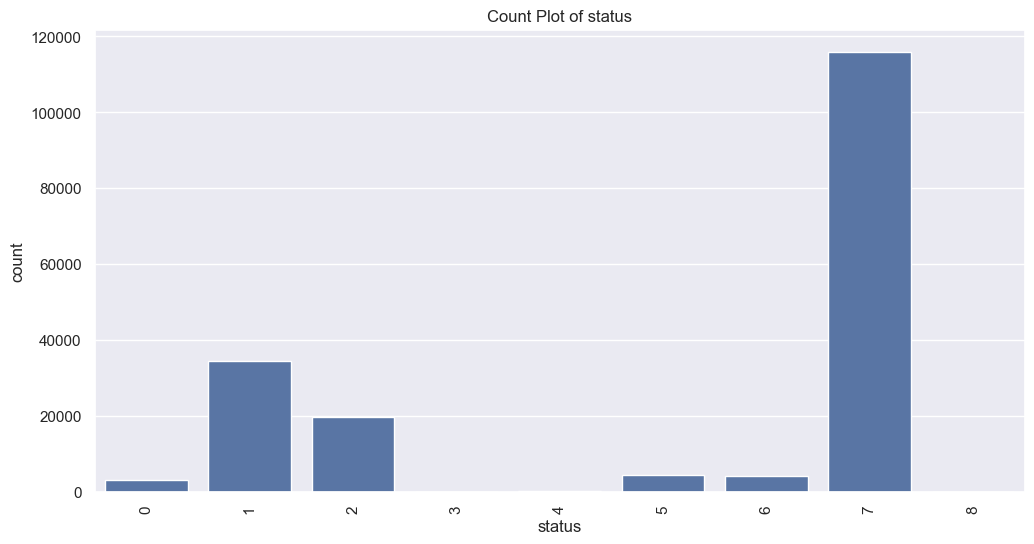

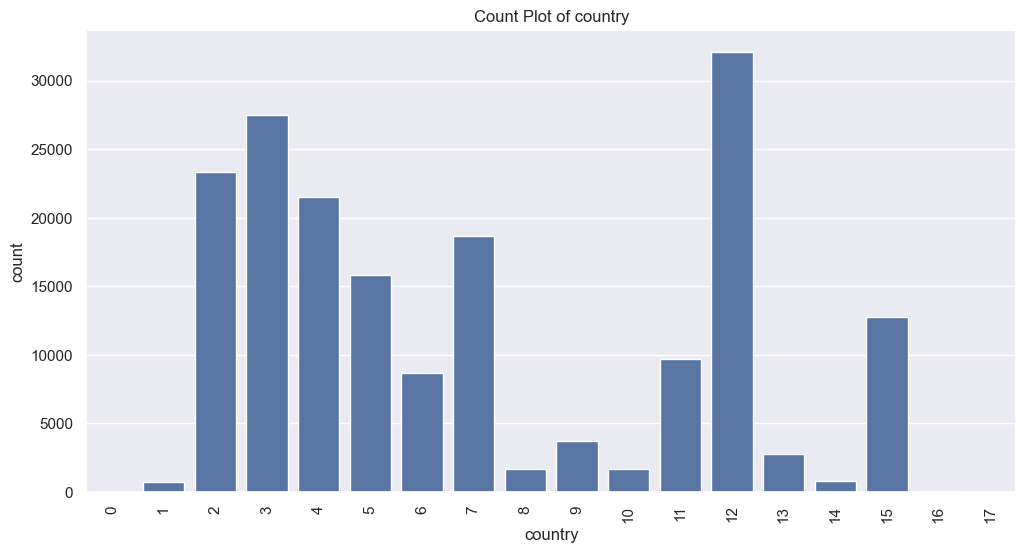

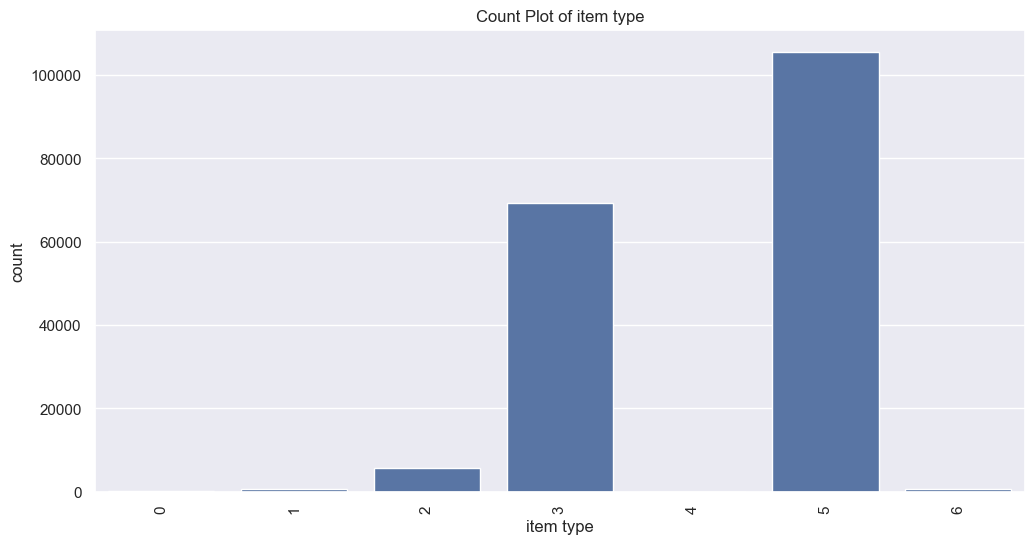

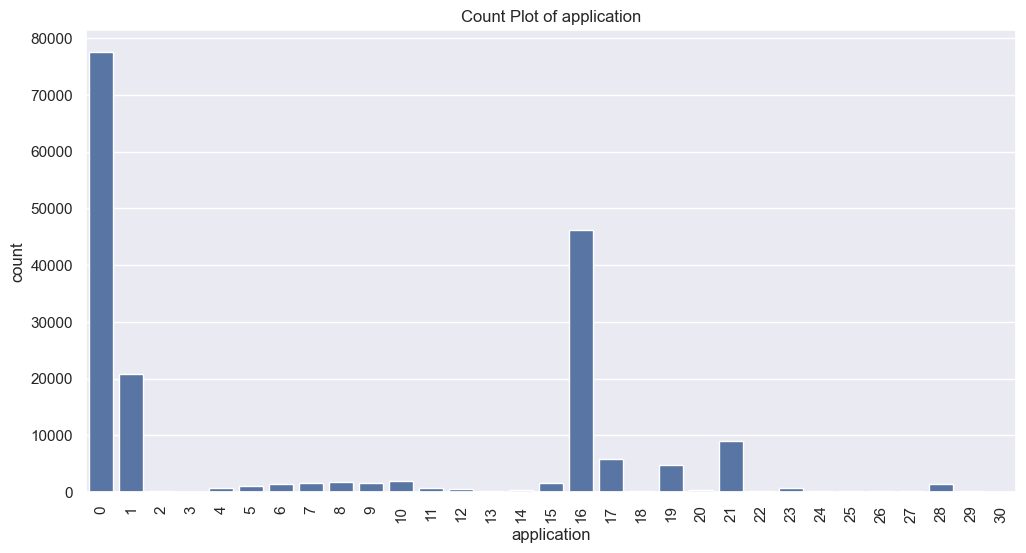

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['status', 'country', 'item type', 'application']

# Create a count plot for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=df_filled)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=90)
    plt.show()


4. Machine learning part

Independent Features and Dependent Features

In [23]:
y = df_filled['selling_price']   # Target variable
X = df_filled.drop(columns=['selling_price']) ## dtaset


Splitting the data into training and testing

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (145338, 13) (145338,)
Testing set shape: (36335, 13) (36335,)


In [25]:
df_filled

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,167599,20210401.0,135668,30156308.0,5,7,5,0,2.00,1500.0,10445,1670798778,20210701.0,854.00
1,55577,20210401.0,163266,30202938.0,2,7,5,16,0.80,1210.0,1184,1668701718,20210401.0,1047.00
2,159737,20210401.0,110073,30153963.0,6,7,6,9,0.38,952.0,14749,628377,20210101.0,644.33
3,176555,20210401.0,49759,30349574.0,7,7,3,21,2.30,1317.0,10719,1668701718,20210101.0,768.00
4,55380,20210401.0,164459,30211560.0,5,7,5,0,4.00,2000.0,6976,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,157706,20200702.0,11174,30200854.0,2,7,5,16,0.96,1220.0,2004,164141591,20200701.0,591.00
181669,116794,20200702.0,51298,30200854.0,2,7,5,16,0.95,1500.0,1966,164141591,20200701.0,589.00
181670,103139,20200702.0,111994,30200854.0,2,7,5,16,0.71,1250.0,2200,164141591,20200701.0,619.00
181671,87216,20200702.0,2,30200854.0,2,7,5,16,0.85,1250.0,2037,164141591,20200701.0,601.00


Feature Scalling

In [26]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
X_train = scaler.fit_transform(X_train)

# Convert the standardized array back to a DataFrame for easier handling
X_test = scaler.transform(X_test)


Model Training

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

Evaluation

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate Mean Squared Error and Root Mean Squared Error
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse_dt)
rmse_dt = np.sqrt(mse_dt)

print(f'Decision Tree Mean Squared Error (MSE): {mse_dt}')
print(f'Decision Tree Root Mean Squared Error (RMSE): {rmse_dt}')
print(f'Decision Tree Root Mean Squared Error: {rmse}')


Decision Tree Mean Squared Error (MSE): 190059.5468240677
Decision Tree Root Mean Squared Error (RMSE): 435.9581938948592
Decision Tree Root Mean Squared Error: 435.9581938948592


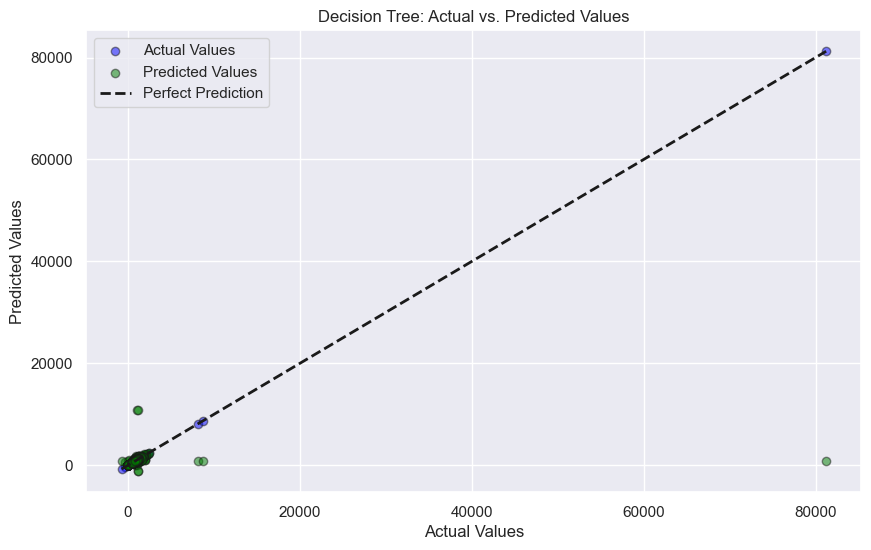

In [47]:
# Create scatter plot
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Values', edgecolors='k')

# Plot predicted values
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.5, label='Predicted Values', edgecolors='k')

# Add a reference line where predicted values exactly match actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.title('Decision Tree: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
